#### EJERCICIO 7

Calcular el diagrama de dispersión de las dos variables correspondientes al peso y a la circunferencia de abdomen 
que aparecen en el fichero Datos-bodyfat.txt. Calcula la recta de regresión y el coeficiente de correlación. 
Análogamente para las dos variables X e Y del fichero Datos-geyser.txt, que corresponden a la duración de las
erupciones y el tiempo hasta la siguiente erupción de un geyser.

Primero, se importan las librerías necesarias:

In [18]:
import numpy as np
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

Se crean los csv de los datos:

In [15]:
# Definir la ruta de los archivos
ruta_txt = 'C:\\Users\\Usuario\\Desktop\\STAT\\Hoja 1\\Data\\Datos-bodyfat.txt'
ruta_csv = 'C:\\Users\\Usuario\\Desktop\\STAT\\Hoja 1\\Data\\Datos-bodyfat.csv'


# Abrir el archivo de texto y crear el archivo CSV de Datos-bodyfat
with open(ruta_txt, 'r+') as txtfile1, \
     open(ruta_csv, 'w', newline='') as csvfile1, \
     open('temp.txt', 'w') as temp_file:
    # Leer el archivo de texto línea por línea y escribir en el archivo CSV
    for line in txtfile1:
        # Reemplazar "," con "."
        contenido_actualizado1 = line.replace(",", ".")
        # Dividir los valores en cada línea en una lista
        row1 = contenido_actualizado1.strip().split()
        # Crear un objeto csv writer y escribir la lista en el archivo CSV
        writer = csv.writer(csvfile1)
        writer.writerow(row1)
        # Escribir la línea actualizada en el archivo temporal
        temp_file.write(contenido_actualizado1)

# Reemplazar el contenido del archivo de texto original con el del archivo temporal
os.replace('temp.txt', ruta_txt)

In [13]:
# Definir la ruta de los archivos
ruta_txt2 = 'C:\\Users\\Usuario\\Desktop\\STAT\\Hoja 1\\Data\\Datos-geyser.txt'
ruta_csv2 = 'C:\\Users\\Usuario\\Desktop\\STAT\\Hoja 1\\Data\\Datos-geyser.csv'


# Abrir el archivo de texto y crear el archivo CSV de Datos-geyser
with open(ruta_txt2, 'r+') as txtfile2, \
     open(ruta_csv2, 'w', newline='') as csvfile2, \
     open('temp2.txt', 'w') as temp_file2:

    # Leer el archivo de texto línea por línea y escribir en el archivo CSV
    for line in txtfile2:
        # Reemplazar "," con "."
        contenido_actualizado2 = line.replace(",", ".")
        # Dividir los valores en cada línea en una lista
        row2 = contenido_actualizado2.strip().split()
        # Crear un objeto csv writer y escribir la lista en el archivo CSV
        writer2 = csv.writer(csvfile2)
        writer2.writerow(row2)
        # Escribir la línea actualizada en el archivo temporal
        temp_file2.write(contenido_actualizado2)

# Reemplazar el contenido del archivo de texto original con el del archivo temporal
os.replace('temp2.txt', ruta_txt2)

1. Gráfica de dispersión, recta de regresión y coeficiente de correlación para el conjunto de datos Datos-bodyfat.
[Descripción de los datos.](https://matematicas.uam.es/~joser.berrendero/datos/descripcion-datos-bodyfat.txt)

In [16]:
data1 = pd.read_csv(ruta_csv, header=None)
data1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


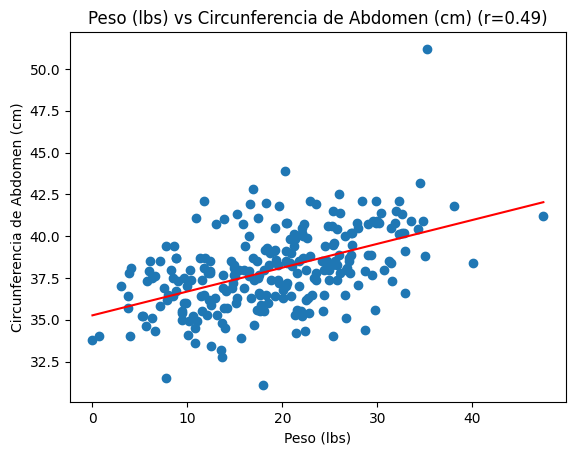

In [19]:
plt.scatter(data1.iloc[:,1], data1.iloc[:,5])

# Ajustar la línea de regresión
slope, intercept = np.polyfit(data1.iloc[:,1], data1.iloc[:,5], 1)
x = np.array([data1.iloc[:,1].min(), data1.iloc[:,1].max()])
y = slope * x + intercept
plt.plot(x, y, color='red')

# Calcular el coeficiente de correlación
corr, _ = pearsonr(data1.iloc[:,1], data1.iloc[:,5])

# Personalizar el scatterplot
plt.title('Peso (lbs) vs Circunferencia de Abdomen (cm) (r={:.2f})'.format(corr))
plt.xlabel('Peso (lbs)')
plt.ylabel('Circunferencia de Abdomen (cm)')

# Mostrar el scatterplot
plt.show()

2. Gráfica de dispersión, recta de regresión y coeficiente de correlación para el conjunto de datos Datos-geyser. 
[Descripción de los datos.](https://matematicas.uam.es/~joser.berrendero/datos/descripcion-datos-geyser.txt)

In [21]:
data2 = pd.read_csv(ruta_csv2)
data2.head()

,D,Y,X
0,1,78,4.4
1,1,74,3.9
2,1,68,4.0
3,1,76,4.0
4,1,80,3.5


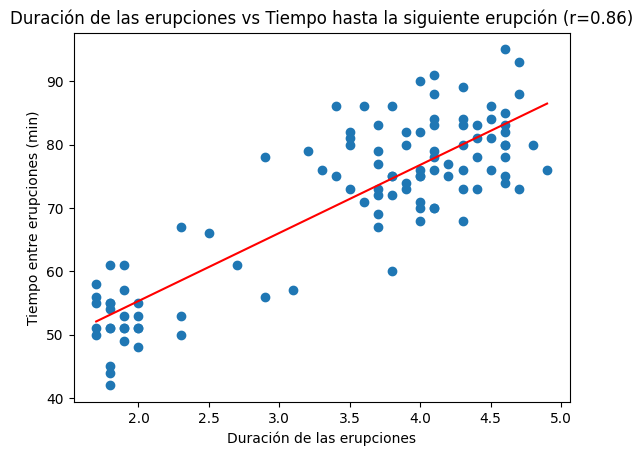

In [24]:
plt.scatter(data2['X'], data2['Y'])

# Ajustar la línea de regresión
slope, intercept = np.polyfit(data2['X'], data2['Y'], 1)
x = np.array([data2['X'].min(), data2['X'].max()])
y = slope * x + intercept
plt.plot(x, y, color='red')

# Calcular el coeficiente de correlación
corr2, _ = pearsonr(data2['X'], data2['Y'])

# Personalizar el scatterplot
plt.title('Duración de las erupciones vs Tiempo hasta la siguiente erupción (r={:.2f})'.format(corr2))
plt.xlabel('Duración de las erupciones')
plt.ylabel('Tiempo entre erupciones (min)')

# Mostrar el scatterplot
plt.show()